## Online store website data scraping and analytics

Dressup.ge is one of the most popular online stores in Georgia with world famous brands and wide entire range.

Main idea: collect all products from website https://dressup.ge/en/ and make conclusions about it's products range.

All prices are in GEL (Georgian Lari, approx. 1 USD = 2.5 GEL), products amount is unknown.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from tqdm import tqdm
from time import sleep
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style = 'darkgrid')
%matplotlib inline

In [2]:
data = []

# Men's clothes
for p in tqdm(range(1,120)):
    url = f'https://dressup.ge/en/8-mens-clothing?page={p}'
    r = requests.get(url)
    sleep(0.5)
    soup = BeautifulSoup(r.text, 'lxml')
    cards = soup.findAll('div', class_='js-product-miniature-wrapper')
    for card in cards: 
        try:
            brand = card.find('div',class_='product-brand text-muted').text
            product = card.find('h2',class_='h3 product-title').text.strip()
            sex = 'male'
            category = card.find('div',class_='product-category-name text-muted').text
            price = float(card.find('span', class_='product-price').get('content'))
            sizes = card.find('div',class_='iqitsizeguide-avaiable-sizes pt-2').text.strip().split('\n')
            data.append([brand,product,sex,category,sizes,price])
        except:
            pass

100%|█████████████████████████████████████████| 119/119 [01:54<00:00,  1.04it/s]


In [3]:
# Women's clothes
for p in tqdm(range(1,119)):
    url = f'https://dressup.ge/en/74-women?categories=womens-clothing&page={p}'
    r = requests.get(url)
    sleep(0.5)
    soup = BeautifulSoup(r.text, 'lxml')
    cards = soup.findAll('div', class_='js-product-miniature-wrapper')
    for card in cards:
        try:
            brand = card.find('div',class_='product-brand text-muted').text
            product = card.find('h2',class_='h3 product-title').text.strip()
            sex = 'female'
            category = card.find('div',class_='product-category-name text-muted').text
            price = float(card.find('span', class_='product-price').get('content'))
            sizes = card.find('div',class_='iqitsizeguide-avaiable-sizes pt-2').text.strip().split('\n')
            data.append([brand,product,sex,category,sizes,price])
        except:
            pass

100%|█████████████████████████████████████████| 118/118 [05:50<00:00,  2.97s/it]


In [4]:
# Transform collected data to pandas DataFrame
df = pd.DataFrame(data, columns = ['brand','product','sex','category','sizes','price'])

In [5]:
# Exploding sizes list in every row
dfx = df.explode(column='sizes').reset_index().drop(columns=['index'])

In [6]:
# Data overview
dfx.head(10)

,brand,product,sex,category,sizes,price
0,Lacoste,Lacoste,male,Sports trousers,S,549.0
1,Lacoste,Lacoste,male,Sports trousers,M,549.0
2,Lacoste,Lacoste,male,Sports trousers,M/L,549.0
3,Lacoste,Lacoste,male,Sports trousers,L,549.0
4,Lacoste,Lacoste,male,Sports trousers,L/XL,549.0
5,Lacoste,Lacoste,male,Sports trousers,XL,549.0
6,Lacoste,Lacoste,male,T-shirts,S,189.0
7,Lacoste,Lacoste,male,T-shirts,M,189.0
8,Lacoste,Lacoste,male,T-shirts,M/L,189.0
9,Lacoste,Lacoste,male,T-shirts,L,189.0


In [7]:
# Rows count
dfx.shape[0]

48377

In [8]:
dfx.isna().sum()

brand       0
product     0
sex         0
category    0
sizes       0
price       0
dtype: int64

In [9]:
# Total price amount
dfx.price.sum().round(2)

9779239.65

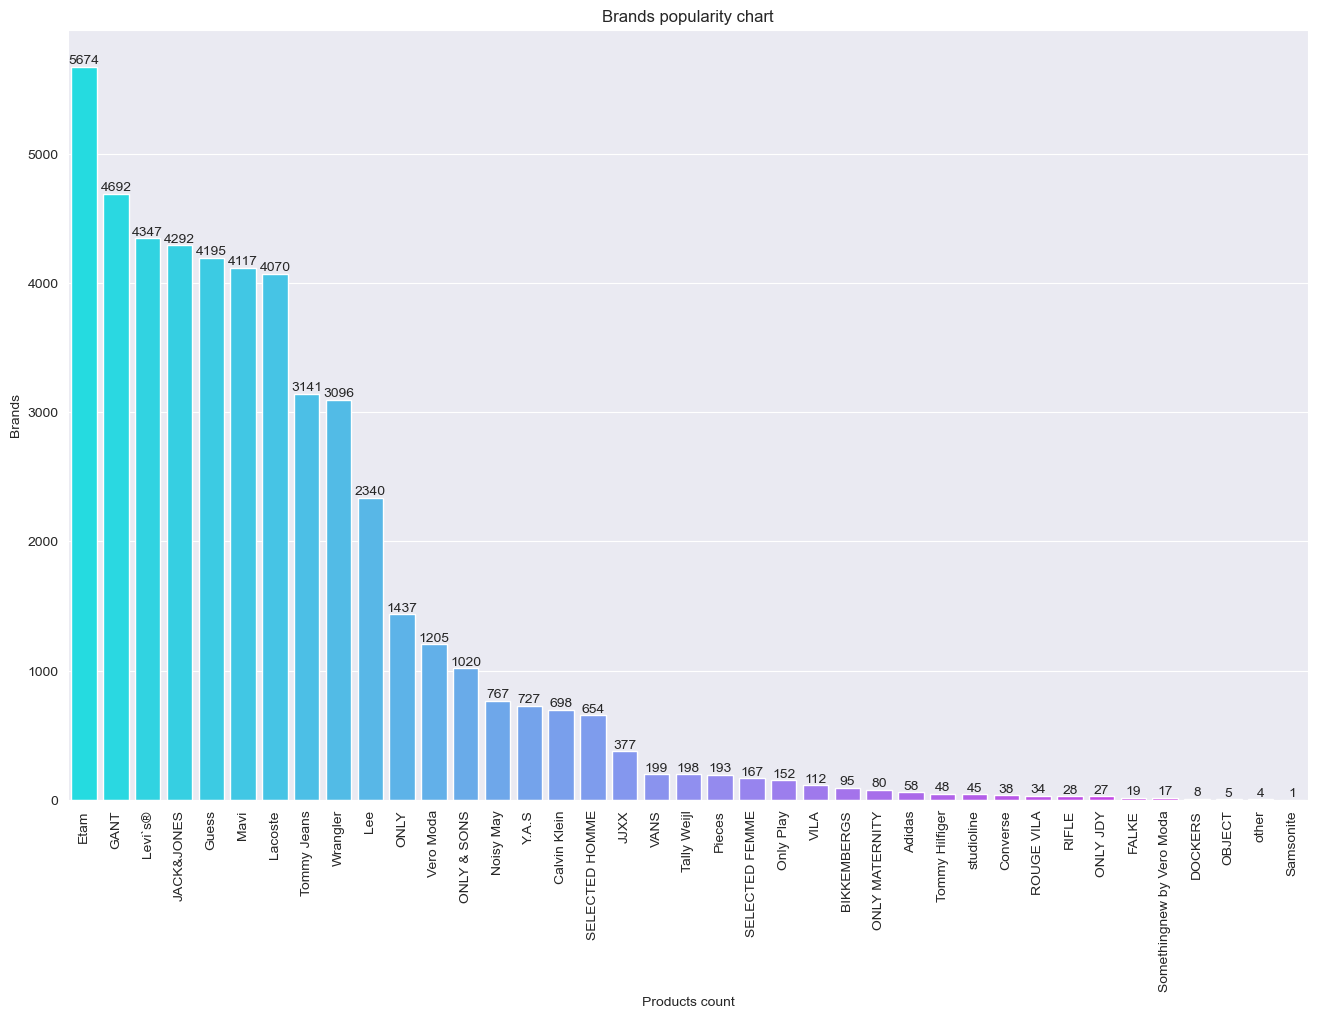

In [10]:
# Brands popularity chart 
plt.figure(figsize = (16,10))
ax = sns.countplot(x = dfx.brand, order=dfx.brand.value_counts().index, palette ='cool')
ax.bar_label(container=ax.containers[0], labels = dfx.brand.value_counts(ascending=False).values)
plt.xticks(rotation = 90)
plt.title('Brands popularity chart')
plt.ylabel('Brands')
plt.xlabel('Products count')
plt.show()

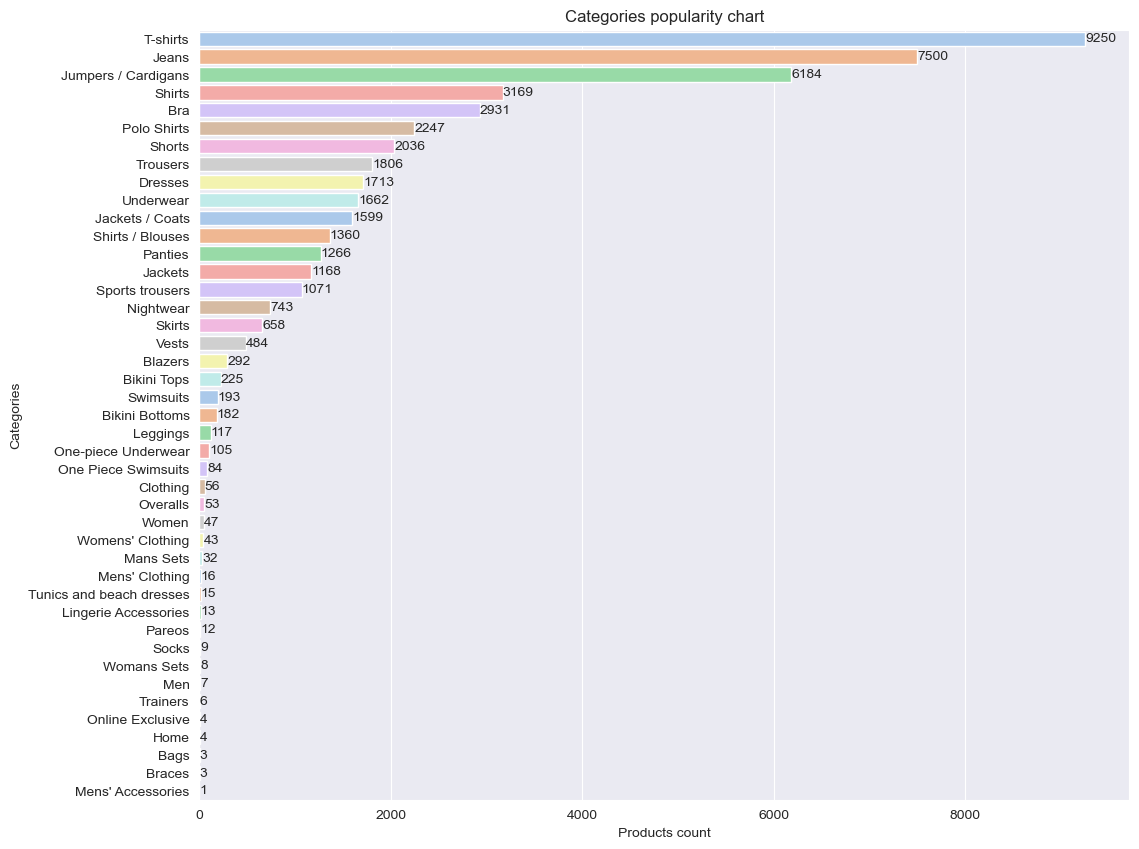

In [11]:
# Categories popularity chart
plt.figure(figsize = (12,10))
ax = sns.countplot(y = dfx.category, order=dfx.category.value_counts().index, palette ='pastel')
ax.bar_label(container=ax.containers[0], labels = dfx.category.value_counts(ascending=False).values)
plt.title('Categories popularity chart')
plt.ylabel('Categories')
plt.xlabel('Products count')
plt.show()

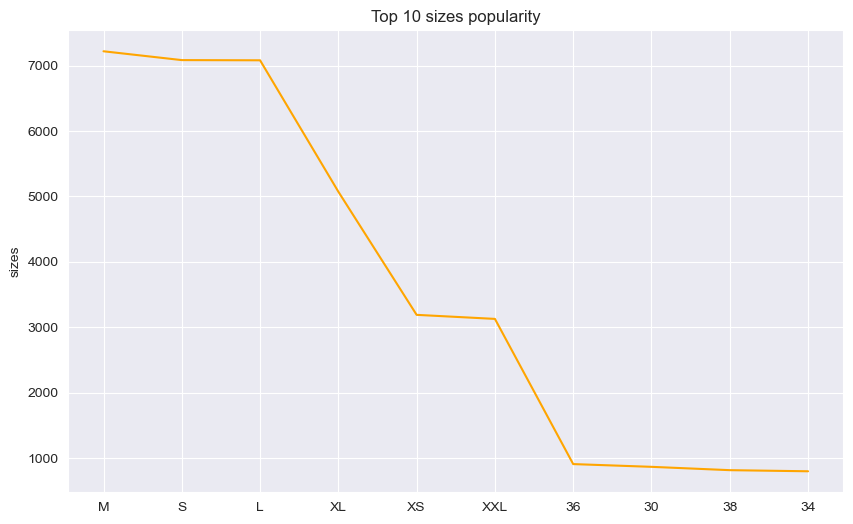

In [12]:
# Top 10 sizes popularity
plt.figure(figsize=(10,6))
size_data = dfx.sizes.value_counts().head(10)
sns.lineplot(data = size_data, color = 'orange')
plt.title('Top 10 sizes popularity')
plt.show()

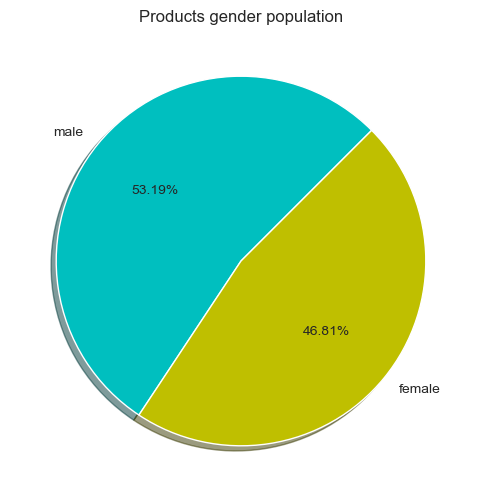

In [13]:
plt.figure(figsize=(8,6))
dfx.sex.value_counts().plot.pie(autopct='%1.2f%%', shadow = True, startangle = 45, colors = ['c','y'])
plt.ylabel('')
plt.title('Products gender population')
plt.show()

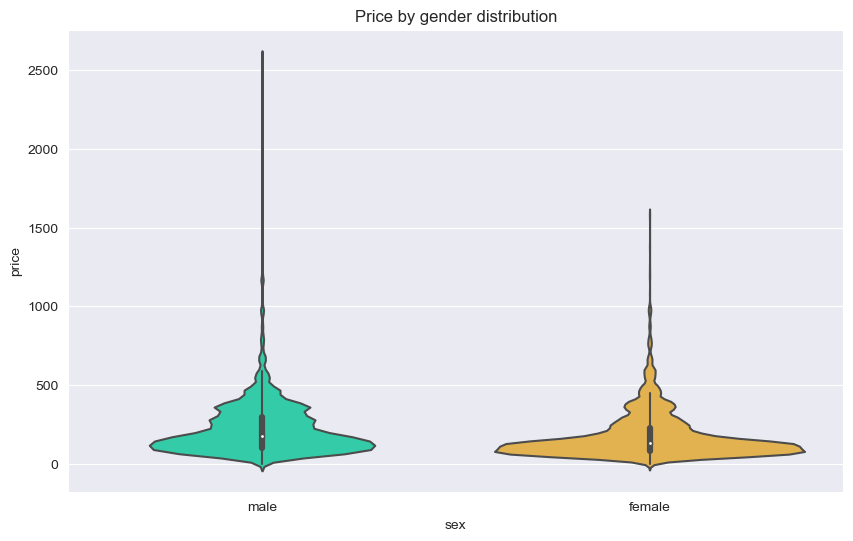

In [14]:
# Price by gender distribution
plt.figure(figsize=(10,6))
sns.violinplot(data = dfx, y = 'price', x = 'sex', palette='turbo')
plt.title('Price by gender distribution')
plt.show()

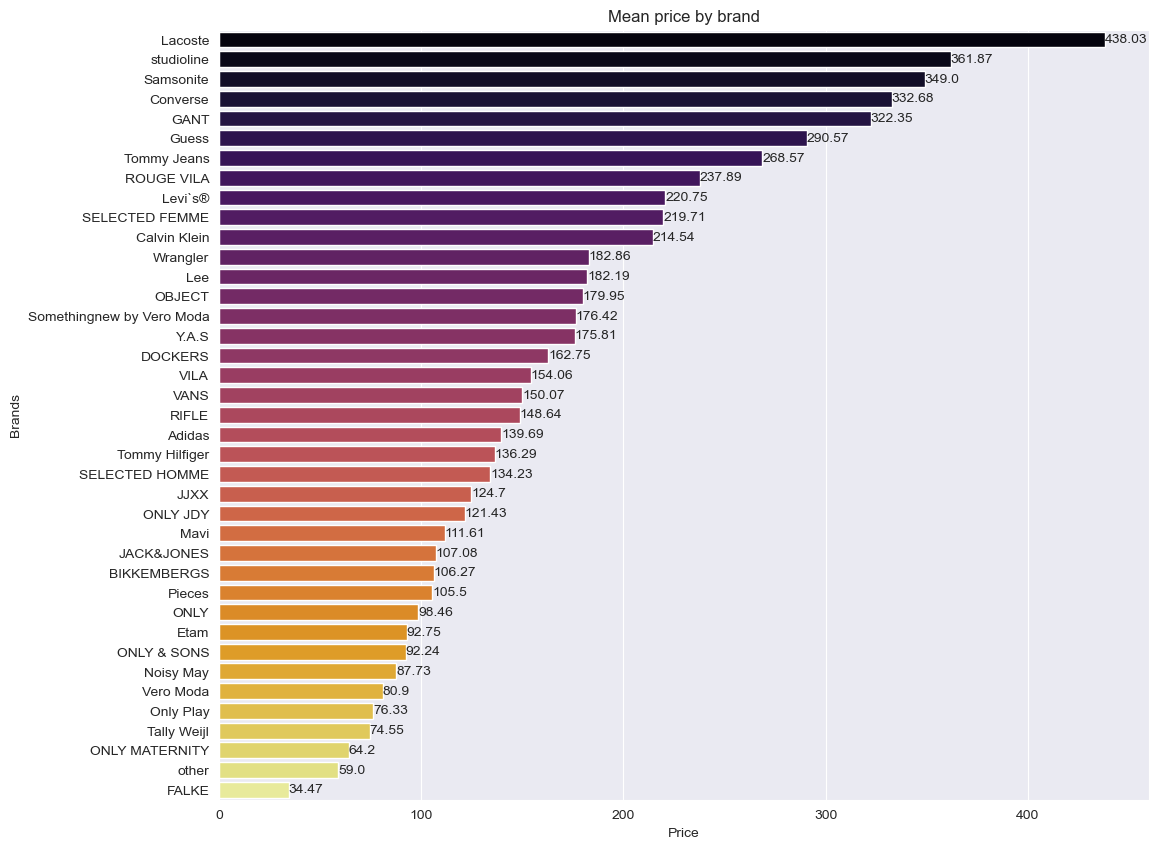

In [15]:
# Mean price by brand
brand_mean_price = dfx.groupby('brand', as_index=False)\
                      .agg({'price':'mean'})\
                      .sort_values('price', ascending=False)
plt.figure(figsize=(12,10))
ax = sns.barplot(y = brand_mean_price.brand, x = brand_mean_price.price, palette = 'inferno')
ax.bar_label(container=ax.containers[0], labels = brand_mean_price.price.values.round(2))
plt.title('Mean price by brand')
plt.ylabel('Brands')
plt.xlabel('Price')
plt.show()

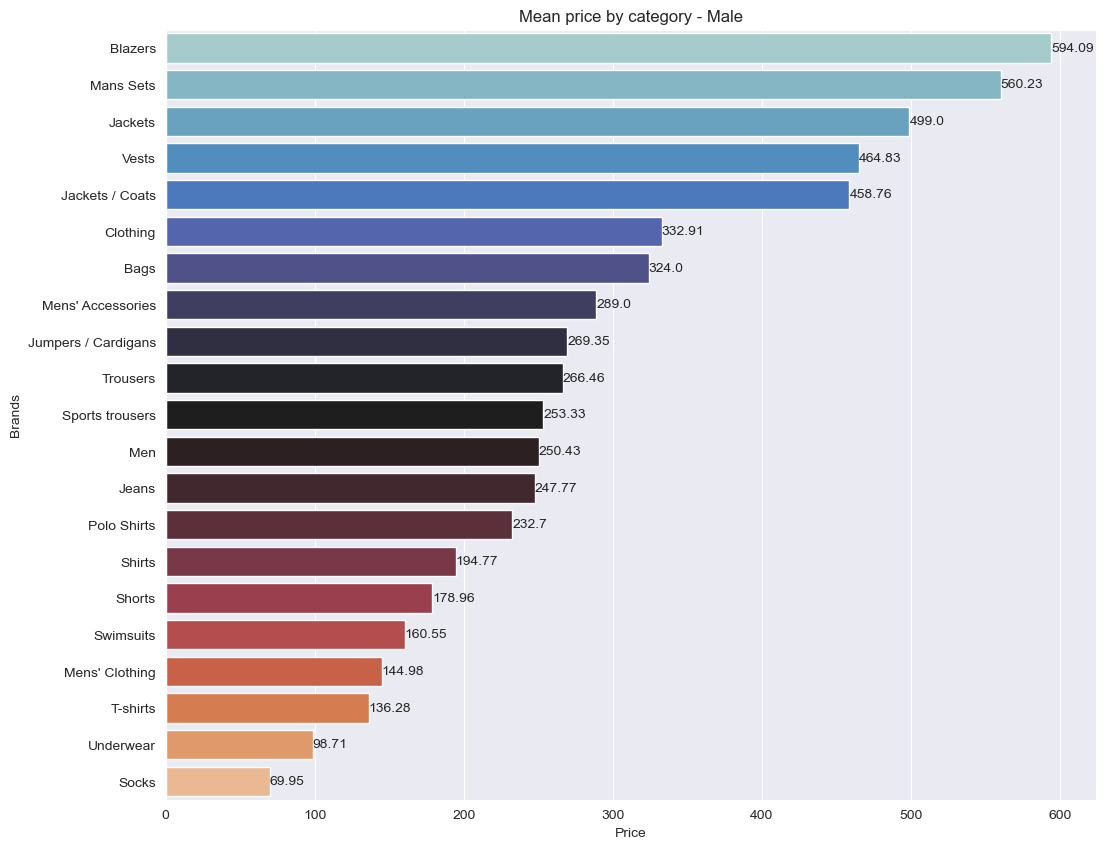

In [16]:
# Mean price by category - Male
category_mean_price_m = dfx[dfx['sex'] =='male'].groupby('category', as_index=False)\
                         .agg({'price':'mean'})\
                         .sort_values('price', ascending=False)
plt.figure(figsize=(12,10))
ax = sns.barplot(y = category_mean_price_m.category, x = category_mean_price_m.price, palette = 'icefire')
ax.bar_label(container=ax.containers[0], labels = category_mean_price_m.price.values.round(2))
plt.title('Mean price by category - Male')
plt.ylabel('Brands')
plt.xlabel('Price')
plt.show()

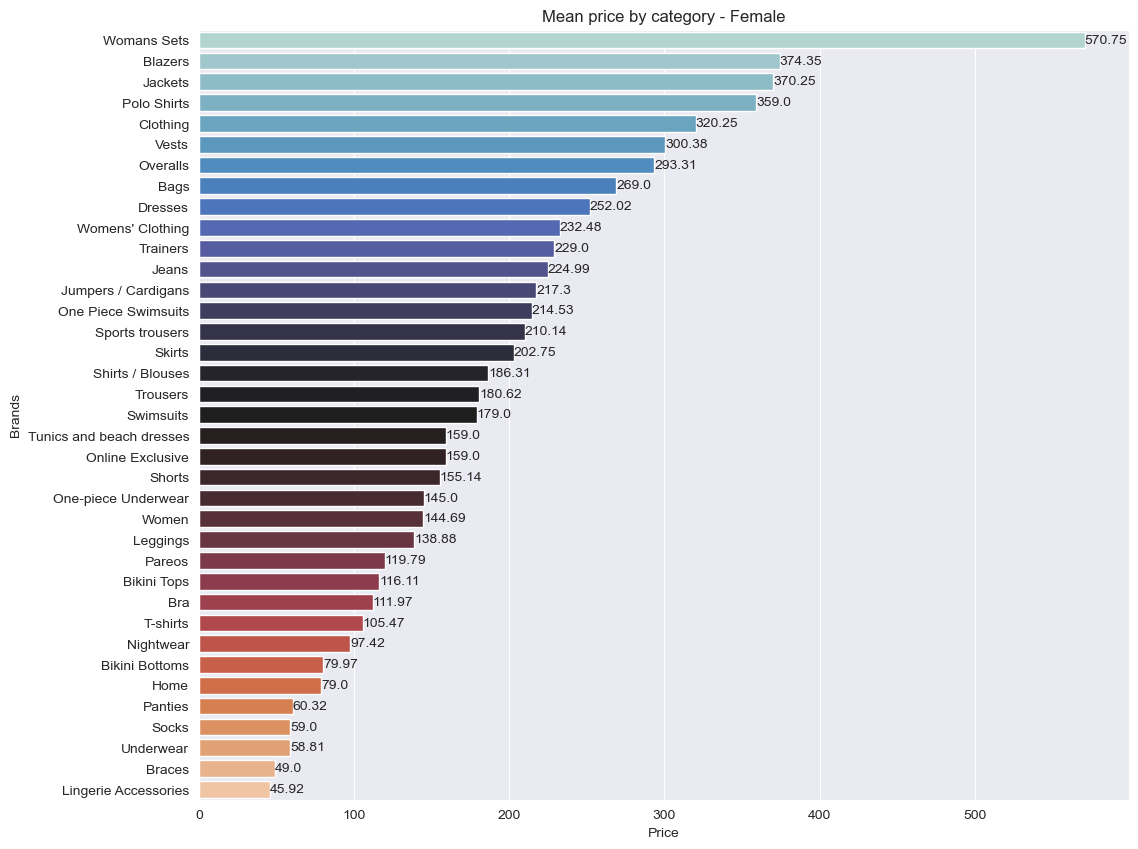

In [17]:
# Mean price by category - Female
category_mean_price_f = dfx[dfx['sex'] =='female'].groupby('category', as_index=False)\
                         .agg({'price':'mean'})\
                         .sort_values('price', ascending=False)
plt.figure(figsize=(12,10))
ax = sns.barplot(y = category_mean_price_f.category, x = category_mean_price_f.price, palette = 'icefire')
ax.bar_label(container=ax.containers[0], labels = category_mean_price_f.price.values.round(2))
plt.title('Mean price by category - Female')
plt.ylabel('Brands')
plt.xlabel('Price')
plt.show()

### Conclusions:
* Total products amount - 48377
* Total price amount - 9,779,239.65 GEL
* Most popular brand - Etam
* Most popular category - T-shirts
* Most pipular size - M
* Gender popularity - 53.19% Male/46.81% Female
* Men's category has more expensive products
* Most expensive brand - Lacoste (438 GEL mean product price)
* Most expensive men's category - Blazers
* Most expensive women's category - Womans Sets